<a href="https://colab.research.google.com/github/austin-ash/CS_167_Classwork/blob/main/Day20Notes_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 20 Notes
### Convolutional Neural Network Code 
We'll get some practice using tensorflow and keras 

In [51]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Enable GPUs
Go to 'Edit' and then 'Notebook Settings'. In the 'Hardware Accelerator' dropdown menu, select 'GPU'. This means that Colab will run on a GPU from Google rather than a CPU which will accelerate our training.

In [52]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [20]:
import keras
import tensorflow
print ("TensorFlow version: " + tensorflow.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.7.0
Keras version: 2.7.0


In [53]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# baseline model for the dogs vs cats dataset
import keras
import sys
from matplotlib import pyplot
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [55]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167/datasets/catdogdata/train' #2000 images
test_data_dir = '/content/drive/MyDrive/CS167/datasets/catdogdata/test'   #400 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


# Load the data
If you get a 'File not found' error here and you're sure your path is correct, make sure you unzipped the catdog.zip file. 

You may need to use a plugin if you want to unzip on Drive. Instead you can download it to your local machine, unzip it on your local machine and then upload to Drive. Uploading/upzipping on Drive may take a while (Mine took about 20 minutes). 

In [56]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [57]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
63/63 [==============================] - 392s 6s/step - loss: 0.6953 - accuracy: 0.5205 - val_loss: 0.6897 - val_accuracy: 0.5700
Epoch 2/5
63/63 [==============================] - 19s 299ms/step - loss: 0.6776 - accuracy: 0.5805 - val_loss: 0.7091 - val_accuracy: 0.5150
Epoch 3/5
63/63 [==============================] - 19s 297ms/step - loss: 0.6619 - accuracy: 0.6115 - val_loss: 0.6782 - val_accuracy: 0.5850
Epoch 4/5
63/63 [==============================] - 19s 298ms/step - loss: 0.6243 - accuracy: 0.6585 - val_loss: 0.6653 - val_accuracy: 0.6300
Epoch 5/5
63/63 [==============================] - 19s 298ms/step - loss: 0.5983 - accuracy: 0.6850 - val_loss: 0.7232 - val_accuracy: 0.5550


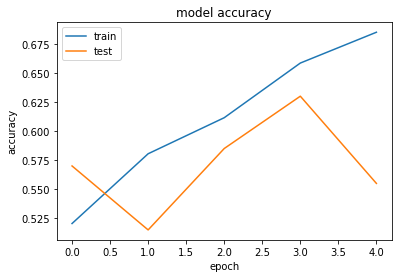

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:

#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
63/63 [==============================] - 14s 215ms/step - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.6876 - val_accuracy: 0.5900
Epoch 2/10
63/63 [==============================] - 13s 209ms/step - loss: 0.6859 - accuracy: 0.5525 - val_loss: 0.6819 - val_accuracy: 0.5200
Epoch 3/10
63/63 [==============================] - 13s 205ms/step - loss: 0.6817 - accuracy: 0.5520 - val_loss: 0.6729 - val_accuracy: 0.5675
Epoch 4/10
63/63 [==============================] - 13s 207ms/step - loss: 0.6755 - accuracy: 0.5830 - val_loss: 0.6647 - val_accuracy: 0.6450
Epoch 5/10
63/63 [==============================] - 13s 210ms/step - loss: 0.6699 - accuracy: 0.5735 - val_loss: 0.6672 - val_accuracy: 0.5675
Epoch 6/10
63/63 [==============================] - 13s 206ms/step - loss: 0.6633 - accuracy: 0.6015 - val_loss: 0.6508 - val_accuracy: 0.6200
Epoch 7/10
63/63 [==============================] - 13s 208ms/step - loss: 0.6542 - accuracy: 0.6130 - val_loss: 0.6514 - val_accuracy: 0.5875

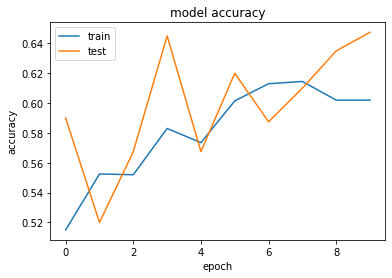

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Now, try your own image:


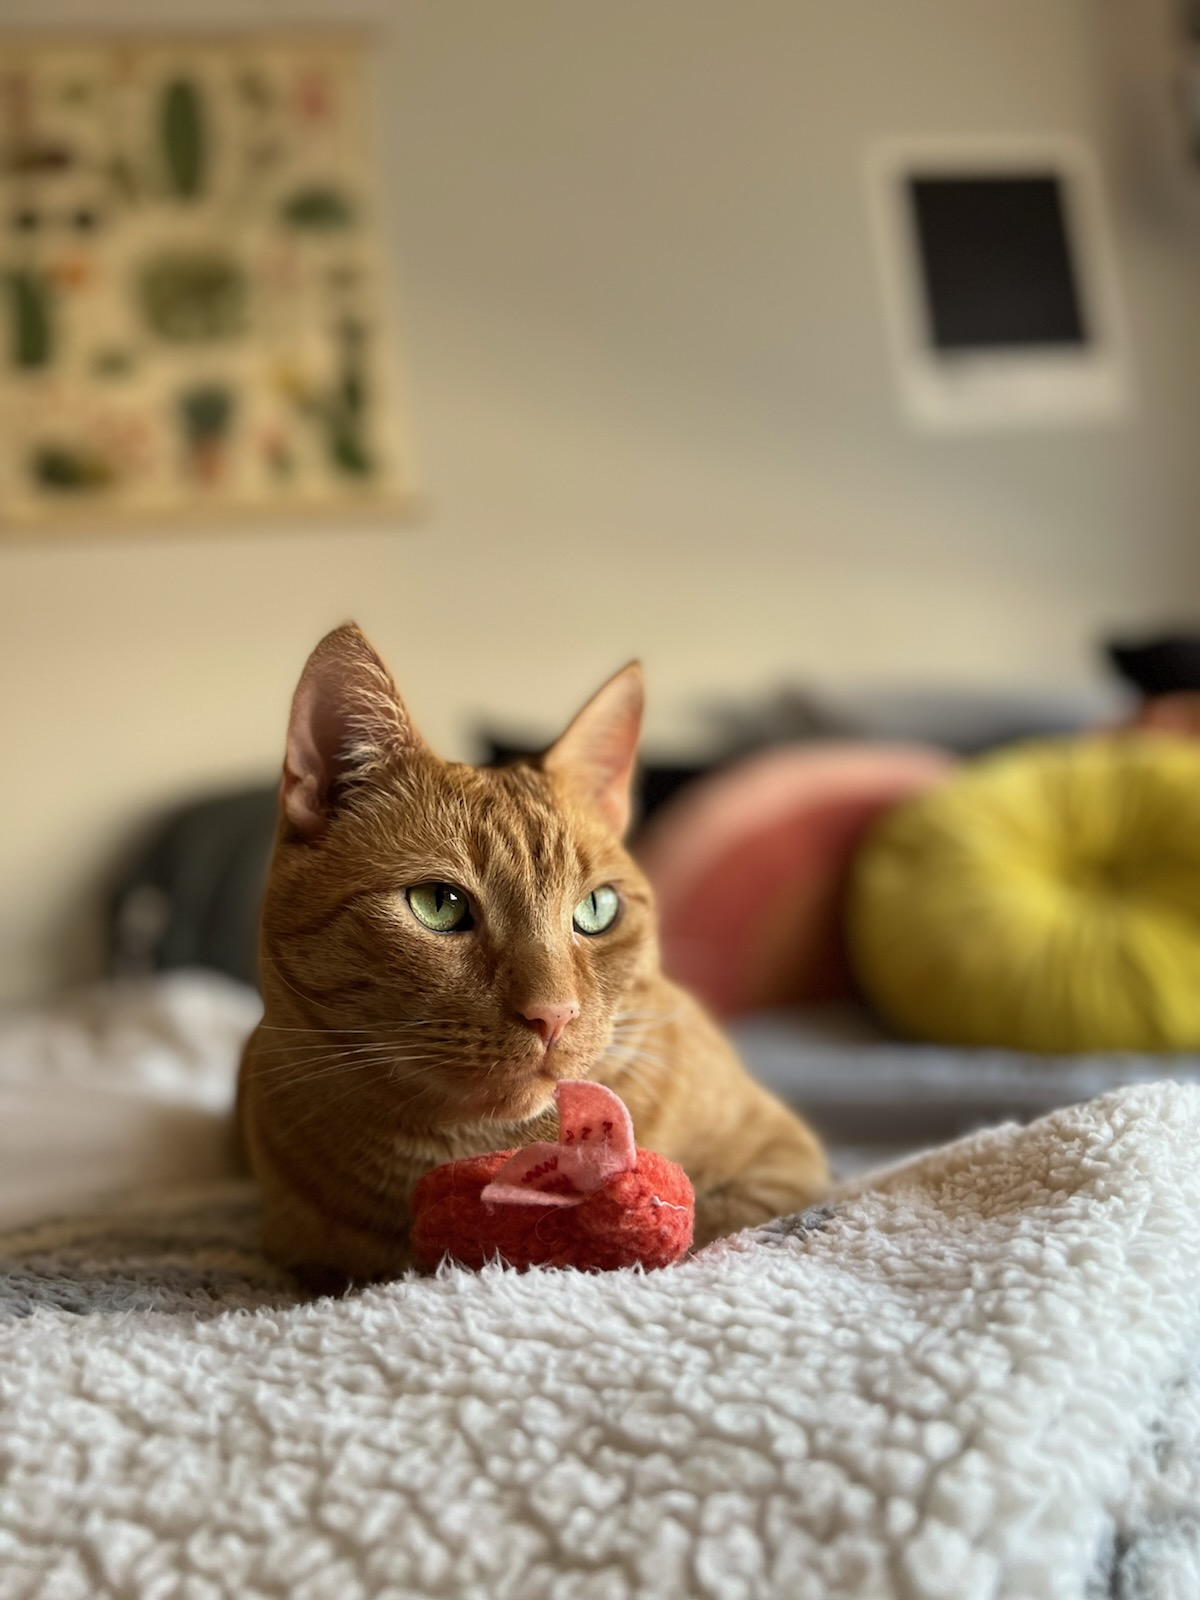

In [64]:
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167/datasets/beans.jpeg', width=600, height=800))

In [65]:
#try your own image..

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img("/content/drive/MyDrive/CS167/datasets/beans.jpeg", target_size=(200, 200))
#img = load_img("cat_pic.jpeg", target_size=(200, 200))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels

img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
#convert image from [0,255] to [0,1]
img = datagen.standardize(img)

# predict the class  # 0 is cat; 1 is dog
result = model2.predict(img)
print(result)

[[0.49860787]]
